In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import plotly.plotly as py

In [18]:
df_booz = pd.read_csv("../data/clean_data/Alcohol_total.csv")
#df_booz = df_booz.iloc(:,0:1)

In [19]:
#df of booz by country avg over 2010-2016
df_booz[-(df_booz["avg_all"].isna())]
all_booz = df_booz[-(df_booz["avg_all"].isna())]
all_booz.head()

,Country Code,Country,Data Source,Beverage Types,2016,2015,2014,2013,2012,2011,2010,avg_total,avg_all
0,AF,Afghanistan,Data source,All types,NaN,0.02,0.03,0.03,0.04,0.04,0.03,0.031667,0.031667
5,AL,Albania,Data source,All types,5.07,4.77,4.81,5.06,5.43,5.65,5.53,5.188571,5.188571
10,DZ,Algeria,Data source,All types,0.56,0.56,0.56,0.54,0.49,0.44,0.39,0.505714,0.505714
15,AD,Andorra,Data source,All types,10.06,9.97,9.95,9.78,10.06,10.31,10.64,10.110000,10.110000
20,AO,Angola,Data source,All types,4.70,5.65,9.00,8.02,8.14,7.86,7.67,7.291429,7.291429


In [20]:
df_summBooz = all_booz[["Country","avg_all"]]
df_summBooz.head()


,Country,avg_all
0,Afghanistan,0.031667
5,Albania,5.188571
10,Algeria,0.505714
15,Andorra,10.110000
20,Angola,7.291429


In [21]:
df_happy = pd.read_csv("../data/clean_data/HappyIncome_10-16.csv")

In [22]:
#df of happiness data (most current year) with happiness avg from 2010-2016
df_allHappy = df_happy.groupby("country",as_index=False).last()
df_allHappy.head()

,country,Alpha Code,year,Life Ladder,avg. Happiness scale 0-10,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,AF,2016,4.220169,3.897008,7.461401,0.559072,52.016529,0.522566,0.057072,...,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
1,Albania,AL,2016,4.511101,5.018378,9.337774,0.638411,68.871811,0.729819,-0.023276,...,0.675244,0.321706,0.400910,0.208456,-0.139161,2.646668,0.586701,0.290,0.303250,0.416540
2,Algeria,DZ,2016,5.340854,5.616222,9.541166,0.748588,65.509514,0.586663,-0.198871,...,0.660510,0.377112,NaN,-1.008262,-0.814304,2.114553,0.395920,0.276,0.276000,0.604617
3,Angola,AO,2014,3.794838,4.420299,8.741957,0.754615,52.460709,0.374542,-0.157882,...,0.578517,0.367864,0.572346,-0.739363,-1.168539,2.196711,0.578868,NaN,0.427000,0.440699
4,Argentina,AR,2016,6.427221,6.580427,9.824955,0.882819,67.398514,0.847702,-0.191952,...,0.841907,0.311646,0.419562,0.381370,-0.238002,2.127109,0.330953,0.427,0.476067,0.332071


In [23]:
#add options here
df_summBooz = all_booz[["Country","avg_all"]]
df_summHappy = df_allHappy[["country","gini of household income reported in Gallup, by wp5-year","Generosity","Freedom to make life choices"]]
print(df_summHappy.head())

#merge both df
df_merge = df_summBooz.merge(df_summHappy, left_on = "Country", right_on = "country", how = "inner")
#df_merge.count()

#finding the nan values 
df_merge[df_merge.isna().any(axis=1)==True]
#drop countries with nan data
df_merge = df_merge.drop(df_merge.index[df_merge.isna().any(axis=1)==True])
df_merge = df_merge[["country","avg_all","gini of household income reported in Gallup, by wp5-year"]]
#df_merge.head()


       country  gini of household income reported in Gallup, by wp5-year  \
0  Afghanistan                                           0.418629          
1      Albania                                           0.416540          
2      Algeria                                           0.604617          
3       Angola                                           0.440699          
4    Argentina                                           0.332071          

   Generosity  Freedom to make life choices  
0    0.057072                      0.522566  
1   -0.023276                      0.729819  
2   -0.198871                      0.586663  
3   -0.157882                      0.374542  
4   -0.191952                      0.847702  


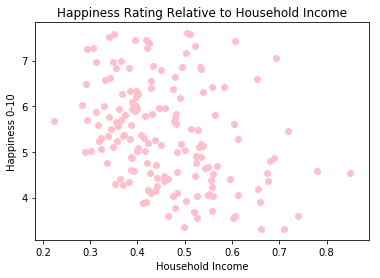

In [24]:
x_axis = df_allHappy["gini of household income reported in Gallup, by wp5-year"]
y_axis = df_allHappy["avg. Happiness scale 0-10"]


plt.title("Happiness Rating Relative to Household Income")
plt.xlabel("Household Income")
plt.ylabel("Happiness 0-10")
# Incorporate a text label regarding year 
#plt.text(42,20,": \n2010-2016 avg.", fontsize = 8)
plt.savefig("./output/Happiness.png")
plt.scatter(x_axis, y_axis,color="pink")
plt.show()

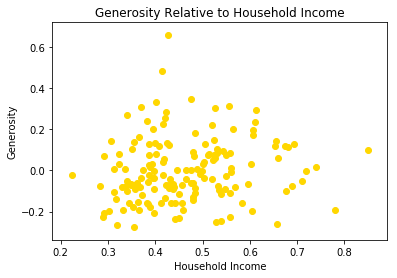

In [25]:
x_axis = df_allHappy["gini of household income reported in Gallup, by wp5-year"]
y_axis = df_allHappy["Generosity"]


plt.title("Generosity Relative to Household Income")
plt.xlabel("Household Income")
plt.ylabel("Generosity")
plt.savefig("./output/Generosity.png")
plt.scatter(x_axis, y_axis,color="gold")
plt.show()

In [30]:
#df_allHappy[df_allHappy["Generosity"]==df_merge["Generosity"].max()]

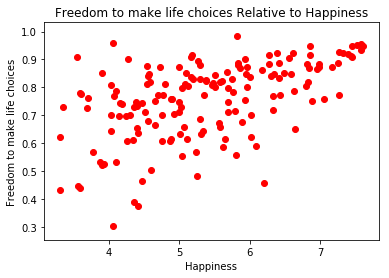

In [27]:
x_axis = df_allHappy["avg. Happiness scale 0-10"]
y_axis = df_allHappy["Freedom to make life choices"]


plt.title("Freedom to make life choices Relative to Happiness")
plt.xlabel("Happiness")
plt.ylabel("Freedom to make life choices")
plt.savefig("./output/Freedom.png")
plt.scatter(x_axis, y_axis,color="red")
plt.show()

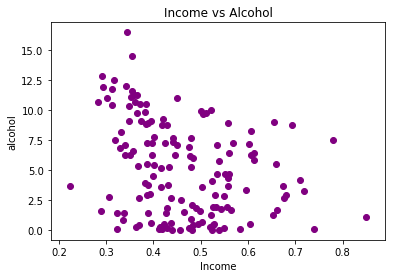

In [28]:
x_axis = df_merge["gini of household income reported in Gallup, by wp5-year"]
y_axis = df_merge["avg_all"]


plt.title("Income vs Alcohol")
plt.xlabel("Income")
plt.ylabel("alcohol")
plt.savefig("./output/incomeVSalcohol.png")
plt.scatter(x_axis, y_axis,color="purple")
plt.show()#rich peeps dont get drunk a lot

In [29]:
df_merge[df_merge["avg_all"]==df_merge["avg_all"].max()]

,country,avg_all,"gini of household income reported in Gallup, by wp5-year"
42,Estonia,16.461429,0.343597


In [13]:
#https://www.kaggle.com/koki25ando/data-analysis-of-world-happiness-report/data
plot_ly(data = df_allHappy, 

        x=~df_allHappy["Log GDP per capita"], 
        y=~df_allHappy["avg. Happiness scale 0-10"], 
        color=~df_allHappy["Healthy life expectancy at birth"], 
        type = "scatter",

        text = ~paste("Country:", country)) %>% 

        layout(title = "Happiness, GDP and Health relationship", 

               xaxis = list(title = "GDP per Capita"),

               yaxis = list(title = "Happiness Score"))

SyntaxError: invalid syntax (<ipython-input-13-85a1f9c0e45a>, line 9)

In [85]:
#bar graph of top 12 happiest countries 
# import data with loadtxt, but only the relevant floats. 
# alcohol = np.loadtxt('Alcohol_total.csv', delimiter=',', skiprows = 1, usecols = range(1,12))
# data = data.transpose()
# xt = np.loadtxt('Alcohol_total.csv', dtype='str', delimiter=',', skiprows = 1, usecols = (0,))

# import the tick labels
# xt = np.loadtxt('data.csv', dtype='str', delimiter=',', skiprows = 1, usecols = (0,))
# def barplot(x_data, y_data, error_data, x_label="", y_label="", title=""):
#     _, ax = plt.subplots()
#     # Draw bars, position them in the center of the tick mark on the x-axis
#     ax.bar(x_data, y_data, color = '#539caf', align = 'center')
#     # Draw error bars to show standard deviation, set ls to 'none'
#     # to remove line between points
#     ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
#     ax.set_ylabel(y_label)
#     ax.set_xlabel(x_label)
#     ax.set_title(title)
# plt.show()

In [86]:

def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    # Create the plot object
    _, ax = plt.subplots()

    # Plot the best fit line, set the linewidth (lw), color and
    # transparency (alpha) of the line
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
plt.show()

In [87]:
def histogram(data, n_bins, cumulative=False, x_label = "", y_label = "", title = ""):
    _, ax = plt.subplots()
    ax.hist(data, n_bins = n_bins, cumulative = cumulative, color = '#539caf')
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
plt.show()

In [88]:
# Overlay 2 histograms to compare them
def overlaid_histogram(data1, data2, n_bins = 0, data1_name="", data1_color="#539caf", data2_name="", data2_color="#7663b0", x_label="", y_label="", title=""):
    # Set the bounds for the bins so that the two distributions are fairly compared
    max_nbins = 10
    data_range = [min(min(data1), min(data2)), max(max(data1), max(data2))]
    binwidth = (data_range[1] - data_range[0]) / max_nbins


    if n_bins == 0
    	bins = np.arange(data_range[0], data_range[1] + binwidth, binwidth)
    else: 
    	bins = n_bins

    # Create the plot
    _, ax = plt.subplots()
    ax.hist(data1, bins = bins, color = data1_color, alpha = 1, label = data1_name)
    ax.hist(data2, bins = bins, color = data2_color, alpha = 0.75, label = data2_name)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best')
plt.show()

SyntaxError: invalid syntax (<ipython-input-88-8cb5d0a6c8fb>, line 9)

In [32]:
# # Fixing random state for reproducibility
# np.random.seed(19680801)

# # Compute areas and colors
# N = 150
# r = 2 * np.random.rand(N)
# theta = 2 * np.pi * np.random.rand(N)
# area = 200 * r**2
# colors = theta

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='polar')
# c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

In [31]:
# fig = plt.figure()
# ax = fig.add_subplot(111, polar=True)
# c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

# ax.set_rorigin(-2.5)
# ax.set_theta_zero_location('W', offset=10)